In [1]:
import os
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, GRU
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [2]:
def process_artist_lyrics(artist_csv_path):
    # Loading the artist's CSV file
    artist_df = pd.read_csv(artist_csv_path)
    # Checking for and dropping rows with null values in the 'Lyric' column
    artist_df.dropna(subset=['Lyric'], inplace=True)
    # Removing duplicate lyrics
    artist_df.drop_duplicates(subset=['Lyric'], inplace=True)
    # Extracting only the 'Lyric' column
    artist_lyrics = artist_df['Lyric']
    return artist_lyrics

def combine_artist_lyrics(artist_csv_directory):
    csv_files = [file for file in os.listdir(artist_csv_directory) if file.endswith('.csv')]
    # Initializing an empty list to store individual artist lyric DataFrames
    artist_lyric_dfs = []
    # Processing each artist's lyrics
    for csv_file in csv_files:
        artist_csv_path = os.path.join(artist_csv_directory, csv_file)
        artist_lyrics = process_artist_lyrics(artist_csv_path)
        artist_lyric_dfs.append(artist_lyrics)
    # Concatenating the individual artist lyric DataFrames into one DataFrame
    combined_lyrics_df = pd.concat(artist_lyric_dfs, ignore_index=True)
    return combined_lyrics_df


artists_csv_directory = './csv/'
data = combine_artist_lyrics(artists_csv_directory)

# Converting the combined lyrics series into a DataFrame with a column name
data = pd.DataFrame(data, columns=['Lyric'])

In [3]:
data.head()

,Lyric
0,thought i'd end up with sean but he wasn't a m...
1,yeah breakfast at tiffany's and bottles of bub...
2,you you love it how i move you you love it how...
3,ariana grande nicki minaj i've been here all ...
4,right now i'm in a state of mind i wanna be in...


In [4]:
data.shape

(3900, 1)

In [5]:
data, _ = train_test_split(data, test_size=0.9, random_state=8462)

In [6]:
data.shape

(390, 1)

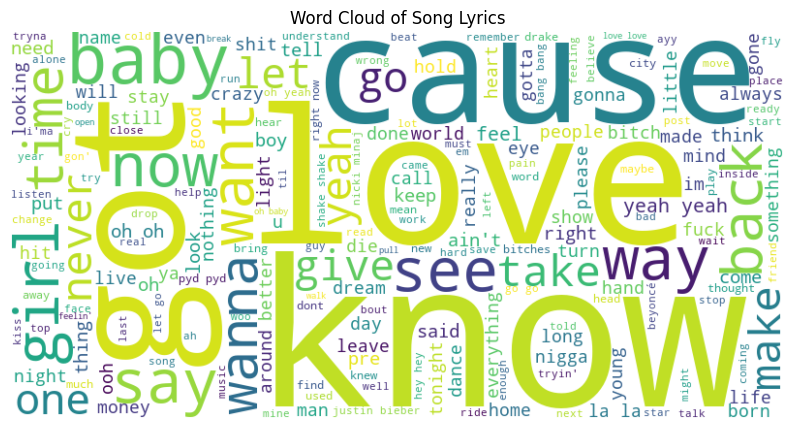

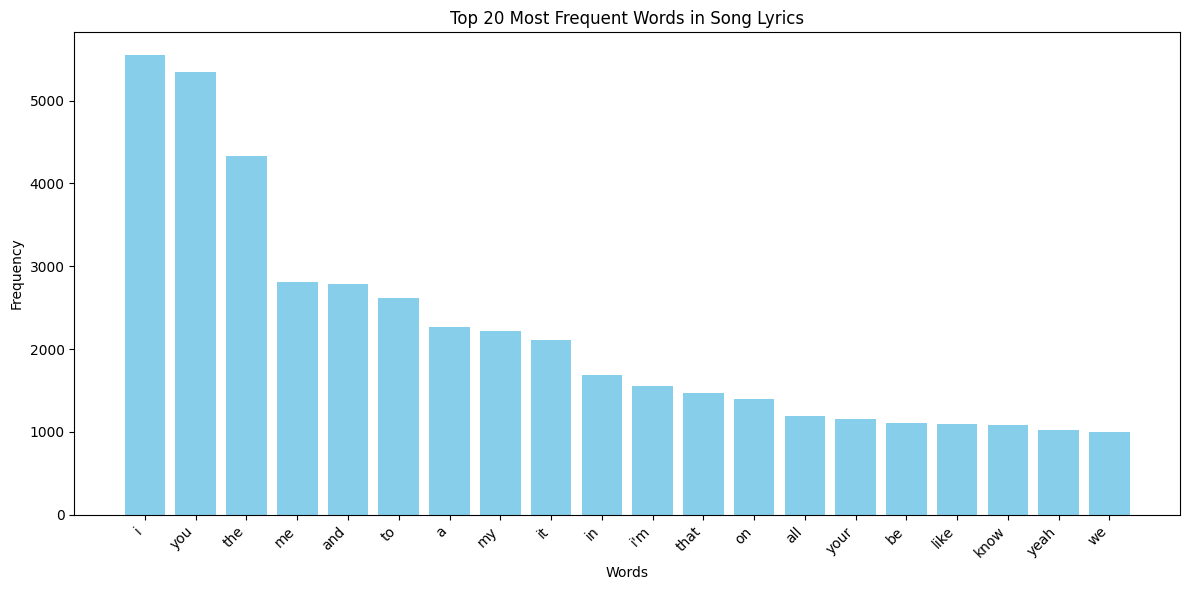

In [7]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data['Lyric']))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Song Lyrics')
plt.axis('off')
plt.show()

# Bar plot of most frequent words
from collections import Counter

# Combining all lyrics into a single string
all_lyrics = ' '.join(data['Lyric'])

# Split the string into words
words = all_lyrics.split()

# Counting the frequency of each word
word_counts = Counter(words)

# Getting the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Extracting words and counts
words, counts = zip(*top_20_words)

plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='skyblue')
plt.title('Top 20 Most Frequent Words in Song Lyrics')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [8]:
column_to_keep = 'Lyric' 

for column in data.columns:
    if column != column_to_keep:
        data.drop(column, axis=1, inplace=True)


data.to_csv('./LyricOnlyText.csv', index=False)

In [9]:
import csv
def extract_and_combine_text(csv_file, column_name, output_file):
    texts = []
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            texts.append(row[column_name])

    with open(output_file, 'w', encoding='utf-8') as out_file:
        for text in texts:
            out_file.write(text + '\n')

csv_file = './LyricOnlyText.csv'
column_name = 'Lyric'
output_file = './LyricALLTexts.txt'

extract_and_combine_text(csv_file, column_name, output_file)

In [10]:
with open(output_file) as f:
    lyric_text = f.read()

lyric_text2  = ''.join(c for c in lyric_text if not c.isdigit())
to_exclude = '\'-—–.·°‡«йцукёенгшщзхъфывапролджэячсмитьбюљѓ»џџ“ґїљћњќє‰ў›‹њ‘”†§ђ¤®¬ќѓ™ёћў¶€µ©_,\xad‚№\xa0±ђ…?!„"#ї$%&()*+-/:;<=>@[\\]^_`{|}~\t\n'
lyric_text_end  = ''.join(c for c in lyric_text2 if c not in to_exclude)
print(lyric_text_end)

theres an old song coming on the radio overrun they got us let the garbage grow tell the kids stop feeling for the refugees cause theyre not like you and theyre not like me   all of the boys they rock and roll cause they dont wanna talk anymore all of the girls get no say in the world just dismissed kiss their kids off to war the lobby lines the diamond mines dont listen to the people who won its a beautiful beautiful world   theres a new song coming on the radio frutas florecen en todo el mundo let the flowers all blossom the hummingbirds hum were all born equal under the same sun someone could be you and you could be someone so do to each other as you would be done   all of the boys they rock and roll cause they dont have to hate anymore all of the girls theyre all over the world the sound of the fourtothefloor and everyone is part of the sum riches will rain on the poor say oh ohoh ohohwhoa its a beautiful beautiful world  you take the noise or you make the noise so sing it like nev

In [11]:
import tensorflow.keras as keras
tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
tokenizer.fit_on_texts(lyric_text_end)
tokenizer.word_index

{' ': 1,
 'e': 2,
 'o': 3,
 't': 4,
 'a': 5,
 'i': 6,
 'n': 7,
 'h': 8,
 's': 9,
 'r': 10,
 'l': 11,
 'y': 12,
 'u': 13,
 'd': 14,
 'm': 15,
 'w': 16,
 'g': 17,
 'b': 18,
 'c': 19,
 'k': 20,
 'f': 21,
 'p': 22,
 'v': 23,
 'j': 24,
 'о': 25,
 'z': 26,
 'x': 27,
 'п': 28,
 'ђ': 29,
 'q': 30,
 'г': 31,
 'ѓ': 32,
 'ј': 33,
 'ѕ': 34,
 'е': 35,
 'д': 36,
 'і': 37,
 'р': 38,
 'ё': 39,
 'љ': 40,
 'ў': 41,
 'ч': 42,
 'є': 43,
 'в': 44,
 'њ': 45,
 'ї': 46}

In [12]:
print(tokenizer.texts_to_sequences(["Milana"]))
print(tokenizer.sequences_to_texts([[15, 6, 11, 5, 7, 5]]))

[[15, 6, 11, 5, 7, 5]]
['m i l a n a']


In [13]:
max_id = len(tokenizer.word_index) 
dataset_size = tokenizer.document_count 
print(max_id,dataset_size)

46 684391


In [14]:
[encoded] = np.array(tokenizer.texts_to_sequences([lyric_text_end])) - 1
print(encoded)

[ 3  7  1 ...  4 17 11]


In [15]:
train_size = dataset_size * 80 // 100
dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])
val_data = tf.data.Dataset.from_tensor_slices(encoded[train_size:])
print(train_size,dataset)

547512 <_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>


In [16]:
n_steps = 100
window_length = n_steps + 1 
dataset = dataset.window(window_length, shift=1, drop_remainder=True)
val_data = val_data.window(window_length, shift=1, drop_remainder=True)
print(n_steps,window_length,dataset)

100 101 <_WindowDataset element_spec=DatasetSpec(TensorSpec(shape=(), dtype=tf.int32, name=None), TensorShape([]))>


In [17]:
# define x and y for each character the next character is the y variable so for defining x we use [0:100], and y [1:101] So for 0, y is 1
dataset = dataset.flat_map(lambda window: window.batch(window_length))
val_data = val_data.flat_map(lambda window: window.batch(window_length))
batch_size = 4096
dataset = dataset.shuffle(1000).batch(batch_size)
val_data = val_data.shuffle(1000).batch(batch_size)
dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
val_data = val_data.map(lambda windows: (windows[:, :-1], windows[:, 1:]))
print(batch_size)

4096


In [18]:
dataset = dataset.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
dataset = dataset.prefetch(1)

val_data = val_data.map(
    lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))
val_data = val_data.prefetch(1)

In [19]:
vocab = sorted(set(lyric_text_end))

ids_from_chars = tf.keras.layers.StringLookup(vocabulary=vocab,mask_token=None)

# Length of the vocabulary in StringLookup Layer

vocab_size = len(ids_from_chars.get_vocabulary())

# The embedding dimension
embedding_dim = 256

# Number of RNN units
rnn_units = 1024

In [29]:
model1 = keras.models.Sequential([
    GRU(32, return_sequences=True, input_shape=[None, max_id],
                     dropout=0.2, recurrent_dropout=0.2),
    GRU(64, return_sequences=True,
                     dropout=0.2, recurrent_dropout=0.2),
    Dense(max_id, activation="softmax")
])


model1.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 32)          7680      
                                                                 
 gru_1 (GRU)                 (None, None, 64)          18816     
                                                                 
 dense (Dense)               (None, None, 46)          2990      
                                                                 
Total params: 29486 (115.18 KB)
Trainable params: 29486 (115.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [30]:
history1 = model1.fit(dataset, epochs=5, validation_data=val_data)

Epoch 1/5

134/134 [==============================] - 630s 5s/step - loss: 3.0057 - val_loss: 2.8043
Epoch 2/5
134/134 [==============================] - 633s 5s/step - loss: 2.6890 - val_loss: 2.4863
Epoch 3/5
134/134 [==============================] - 648s 5s/step - loss: 2.4751 - val_loss: 2.2970
Epoch 4/5
134/134 [==============================] - 697s 5s/step - loss: 2.3594 - val_loss: 2.1958
Epoch 5/5
134/134 [==============================] - 642s 5s/step - loss: 2.2802 - val_loss: 2.1239


In [20]:
def preprocess(texts):
    X = np.array(tokenizer.texts_to_sequences(texts)) - 1
    return tf.one_hot(X, max_id)

In [32]:
def next_char(text, temperature=1):
    X_new = preprocess([text])
    y_proba = model1.predict(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [21]:
def complete_text(text, n_chars=100, temperature=1):
    for _ in range(n_chars):
        text += next_char(text, temperature)
    return text

In [43]:
print(complete_text("You ", temperature=0.62))

1/1 [==============================] - 0s 39ms/step
You lo son i he free i falls me aflit i dove a you beeey in to doume don i gon you ey you wy coud a son 


In [22]:
def show_loss(history):
    fig, ax = plt.subplots(figsize=(6,5))

    ax.plot(history.history["loss"],label = "Train Loss", color = "red")
    ax.plot(history.history["val_loss"],label = "Validation Loss",color = "green")
    ax.set_title("Model Loss", color = "blue", size = 13)
    ax.legend()

    plt.show()

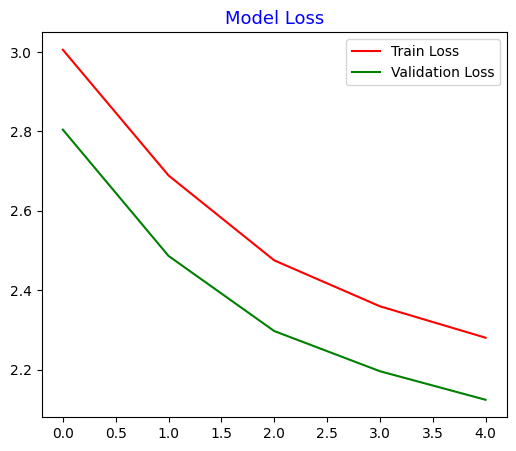

In [42]:
show_loss(history1)

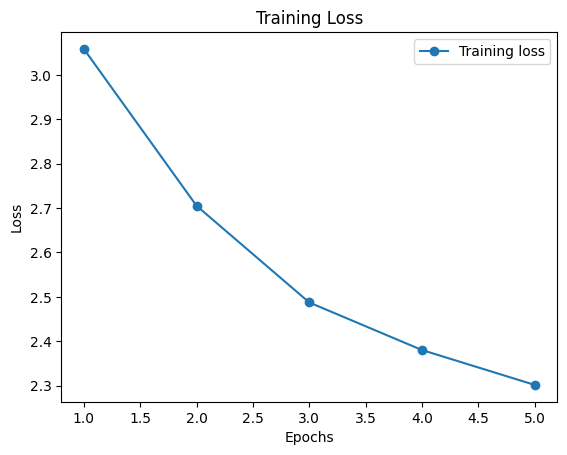

In [33]:
# построение графика функции потерь
loss = history1.history['loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, '-o', label='Training loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [44]:
model1.save('model1')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


In [39]:
load_model1 = keras.models.load_model('model1')

In [24]:
model2 = keras.models.Sequential([
    LSTM(32, return_sequences=True, input_shape=[None, max_id],
                                  dropout=0.2, recurrent_dropout=0.2),
    LSTM(64, return_sequences=True,
                                  dropout=0.2, recurrent_dropout=0.2),
    Dense(max_id, activation="softmax")
])

model2.compile(loss="sparse_categorical_crossentropy", optimizer="adam")
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, None, 32)          10112     
                                                                 
 lstm_9 (LSTM)               (None, None, 64)          24832     
                                                                 
 dense_4 (Dense)             (None, None, 46)          2990      
                                                                 
Total params: 37934 (148.18 KB)
Trainable params: 37934 (148.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history2 = model2.fit(dataset, epochs=5, validation_data=val_data)

Epoch 1/5

134/134 [==============================] - 904s 7s/step - loss: 3.0146 - val_loss: 2.8646
Epoch 2/5
134/134 [==============================] - 802s 6s/step - loss: 2.8611 - val_loss: 2.8337
Epoch 3/5
134/134 [==============================] - 962s 7s/step - loss: 2.7772 - val_loss: 2.6624
Epoch 4/5
134/134 [==============================] - 923s 7s/step - loss: 2.6430 - val_loss: 2.5471
Epoch 5/5
134/134 [==============================] - 895s 7s/step - loss: 2.5553 - val_loss: 2.4506


In [26]:
def next_char(text, temperature=1):
    X_new = preprocess([text])
    y_proba = model2.predict(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [34]:
print(complete_text("I love you ", temperature=0.62))

1/1 [==============================] - 0s 48ms/step
I love you foe tom h who ire ie aou ir the te teo  me whe peu dan  o ont it al on eung tol inn cet ron yon  io 


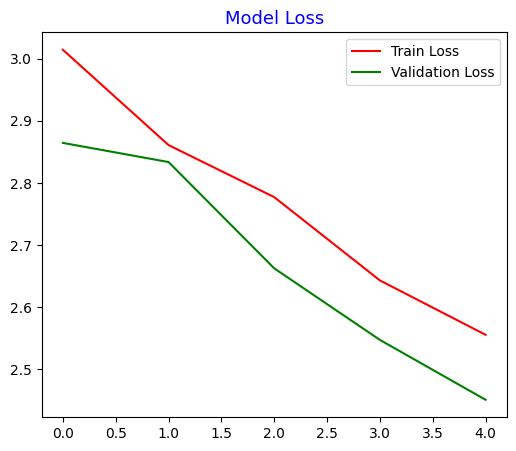

In [36]:
show_loss(history2)

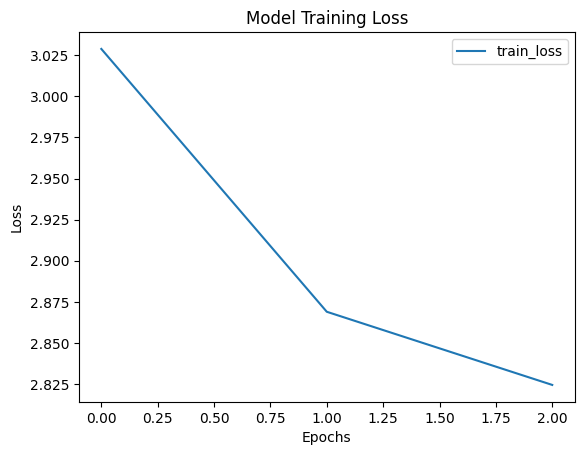

In [36]:
# построение графика обучаемости
plt.plot(history2.history['loss'], label='train_loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [37]:
model2.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


In [23]:
model3 = keras.models.Sequential([
    GRU(32, return_sequences=True, input_shape=[None, max_id],
                     dropout=0.2, recurrent_dropout=0.2),
    LSTM(64, return_sequences=True,
                     dropout=0.2, recurrent_dropout=0.2),
    Dense(128, activation="relu"),
    Dense(max_id, activation="softmax")
])

model3.compile(loss="sparse_categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.001))
model3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, None, 32)          7680      
                                                                 
 lstm (LSTM)                 (None, None, 64)          24832     
                                                                 
 dense (Dense)               (None, None, 128)         8320      
                                                                 
 dense_1 (Dense)             (None, None, 46)          5934      
                                                                 
Total params: 46766 (182.68 KB)
Trainable params: 46766 (182.68 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
history3 = model3.fit(dataset, epochs=5, validation_data=val_data)

Epoch 1/5

134/134 [==============================] - 876s 6s/step - loss: 2.9837 - val_loss: 2.8177
Epoch 2/5
134/134 [==============================] - 1134s 8s/step - loss: 2.6869 - val_loss: 2.4774
Epoch 3/5
134/134 [==============================] - 881s 6s/step - loss: 2.4891 - val_loss: 2.3216
Epoch 4/5
134/134 [==============================] - 762s 6s/step - loss: 2.3723 - val_loss: 2.2278
Epoch 5/5
134/134 [==============================] - 757s 6s/step - loss: 2.2998 - val_loss: 2.1619


In [25]:
def next_char(text, temperature=1):
    X_new = preprocess([text])
    y_proba = model3.predict(X_new)[0, -1:, :]
    rescaled_logits = tf.math.log(y_proba) / temperature
    char_id = tf.random.categorical(rescaled_logits, num_samples=1) + 1
    return tokenizer.sequences_to_texts(char_id.numpy())[0]

In [39]:
print(complete_text("Love ", temperature=0.96))

1/1 [==============================] - 0s 36ms/step
Love you nont try tvatw goneryeacel nite  ar youre withо o des tomy samy bukooher еhaatst ondt  q urreme 


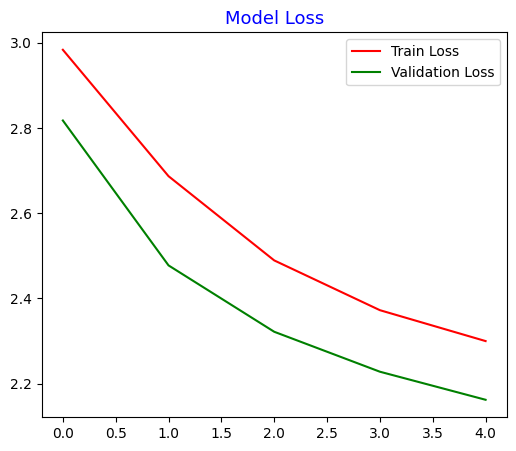

In [40]:
show_loss(history3)

In [41]:
model3.save('model3')

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


In [ ]:
# построение графика обучаемости
plt.plot(history3.history['loss'], label='train_loss')
plt.title('Model Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()